In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker('^GSPC')

In [3]:
sp500 = sp500.history(period='max')

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,0,0
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,0,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,0,0


In [5]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26'],
              dtype='datetime64[ns]', name='Date', length=18219, freq=None)

In [6]:
sp500.shape

(18219, 7)

In [7]:
sp500.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [8]:
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<AxesSubplot:xlabel='Date'>

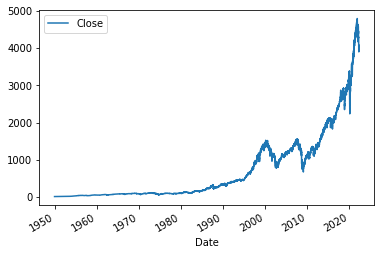

In [9]:
sp500.plot(y='Close', use_index=True)

In [10]:
sp500.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [12]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [13]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [16]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


In [17]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype('int')

In [18]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


In [20]:
sp500 = sp500.loc['1990-01-01':].copy()

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,3973.750000,1
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [26]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [27]:
predictors = ['Close', 'Open', 'Volume', 'High', 'Low']

In [28]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
print('Training score: ', model.score(train[predictors], train['Target']))
print('Test score: ', model.score(test[predictors], test['Target']))

Training score:  0.7444513329200247
Test score:  0.47


In [31]:
import pandas as pd
pred = model.predict(test[predictors])
pred = pd.Series(pred, index=test.index)

In [32]:
pred

Date
2022-01-04    0
2022-01-05    0
2022-01-06    1
2022-01-07    1
2022-01-10    1
             ..
2022-05-20    1
2022-05-23    0
2022-05-24    0
2022-05-25    0
2022-05-26    1
Length: 100, dtype: int64

In [33]:
from sklearn.metrics import precision_score
precision_score(test['Target'], pred)

0.4457831325301205

In [35]:
combined = pd.concat([test['Target'], pred], axis=1)

In [37]:
combined.columns = ['Actual', 'Predictions']

In [38]:
combined

,Actual,Predictions
Date,,
2022-01-04,0,0
2022-01-05,0,0
2022-01-06,0,1
2022-01-07,0,1
2022-01-10,1,1
...,...,...
2022-05-20,1,1
2022-05-23,0,0
2022-05-24,1,0


<AxesSubplot:xlabel='Date'>

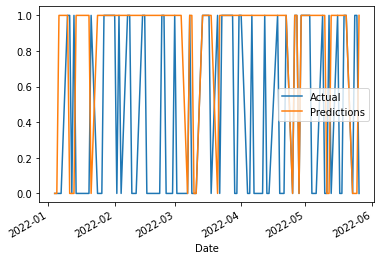

In [39]:
combined.plot()

In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    pred = model.predict(test[predictors])
    pred = pd.Series(pred, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], pred], axis=1)
    return combined

In [41]:
def backtest(data, model, predictors, start=2500, step=250):
    all_preds = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_preds.append(predictions)
    return pd.concat(all_preds)

In [42]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions.Predictions.value_counts()

0    3334
1    2331
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5345345345345346

In [46]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.536981
0    0.463019
Name: Target, dtype: float64

In [47]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f'Close_Ratio_{horizon}'
    sp500[ratio_column] = sp500['Close'] / rolling_average['Close']
    
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [49]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,3973.750000,1,1.000073,1.0,0.984064,2.0,0.906629,27.0,0.879830,132.0,1.129182,553.0
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0,1.009192,2.0,1.004059,3.0,0.924923,27.0,0.896335,132.0,1.149726,553.0
2022-05-24,3942.939941,3955.679932,3875.129883,3941.479980,3901640000,3978.729980,1,0.995923,1.0,1.003378,2.0,0.918954,27.0,0.889264,131.0,1.139996,552.0


In [50]:
sp500 = sp500.dropna()

In [51]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107,1,0.997075,0.0,0.977876,2.0,0.905139,27.0,0.879474,131.0,1.129399,553.0
2022-05-20,3927.760010,3943.419922,3810.320068,3901.360107,4278520000,3973.750000,1,1.000073,1.0,0.984064,2.0,0.906629,27.0,0.879830,132.0,1.129182,553.0
2022-05-23,3919.419922,3981.879883,3909.040039,3973.750000,3392770000,3941.479980,0,1.009192,2.0,1.004059,3.0,0.924923,27.0,0.896335,132.0,1.149726,553.0


In [52]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [53]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    pred = model.predict_proba(test[predictors])[:,1]
    pred[pred >= 0.6] = 1
    pred[pred < 0.6] = 0
    pred = pd.Series(pred, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], pred], axis=1)
    return combined

In [54]:
predictions = backtest(sp500, model, new_predictors)

In [55]:
predictions['Predictions'].value_counts()

0.0    3871
1.0     793
Name: Predictions, dtype: int64

In [56]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5737704918032787